In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

data = pd.read_csv('/Users/gaky/Desktop/MNIST bitch!/digit-recognizer/train.csv')

In [16]:
data = np.array(data)
x_train = data.T[1:]/255.
y_train = data.T[0]


x_train = torch.tensor(x_train.T).float()
y_train = torch.tensor(y_train)

In [26]:
class MNIST_net(nn.Module):
    def __init__(self):
        super(MNIST_net, self).__init__()
        self.l1 = nn.Linear(784, 30)
        #nn.init.kaiming_normal_(self.l1.weight, mode='fan_out', nonlinearity='relu')
        
        self.l2 = nn.Linear(30, 30)
        #nn.init.kaiming_normal_(self.l2.weight, mode='fan_out', nonlinearity='relu')
        
        self.l3 = nn.Linear(30, 10)
    
    
    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = self.l3(x)
        #x = F.softmax(x, dim=1)
        return x

In [28]:
model = MNIST_net()
loss_function = nn.CrossEntropyLoss()
#loss_function = torch.nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=0.2, momentum=0.4)

for i in range(700):
    model.zero_grad()
    out = model(x_train)
    cat = torch.argmax(out, dim=1)
    accuracy = (cat == y_train).float().mean()
    loss = loss_function(out, y_train)
    loss = loss.mean()
    loss.float()
    loss.backward()
    optim.step()

    
    if i%10 == 0:
        #print(out)
        print("loss %.2f accuracy %.2f" % (loss, accuracy))

loss 2.31 accuracy 0.10
loss 2.24 accuracy 0.20
loss 1.94 accuracy 0.48
loss 1.23 accuracy 0.68
loss 0.77 accuracy 0.79
loss 0.58 accuracy 0.84
loss 0.49 accuracy 0.86
loss 0.46 accuracy 0.86
loss 0.41 accuracy 0.88
loss 0.38 accuracy 0.89
loss 0.36 accuracy 0.90
loss 0.35 accuracy 0.90
loss 0.34 accuracy 0.90
loss 0.32 accuracy 0.91
loss 0.31 accuracy 0.91
loss 0.31 accuracy 0.91
loss 0.30 accuracy 0.91
loss 0.29 accuracy 0.92
loss 0.28 accuracy 0.92
loss 0.27 accuracy 0.92
loss 0.27 accuracy 0.92
loss 0.26 accuracy 0.93
loss 0.26 accuracy 0.93
loss 0.25 accuracy 0.93
loss 0.25 accuracy 0.93
loss 0.24 accuracy 0.93
loss 0.24 accuracy 0.93
loss 0.23 accuracy 0.93
loss 0.23 accuracy 0.93
loss 0.22 accuracy 0.94
loss 0.22 accuracy 0.94
loss 0.22 accuracy 0.94
loss 0.21 accuracy 0.94
loss 0.21 accuracy 0.94
loss 0.21 accuracy 0.94
loss 0.20 accuracy 0.94
loss 0.20 accuracy 0.94
loss 0.20 accuracy 0.94
loss 0.19 accuracy 0.94
loss 0.19 accuracy 0.95
loss 0.19 accuracy 0.95
loss 0.19 accura

In [37]:
shit = np.array([2])
fuck = torch.tensor(shit)

In [38]:
F.one_hot(fuck)

tensor([[0, 0, 1]])

In [5]:
test_data = "/Users/gaky/Desktop/MNIST bitch!/digit-recognizer/test.csv"

test_data = pd.read_csv(test_data)
test_data = np.array(test_data)

In [6]:
test_data.shape

(28000, 784)

In [16]:
out = model(torch.tensor(test_data[50]).float())

In [17]:
torch.argmax(out)

tensor(6)

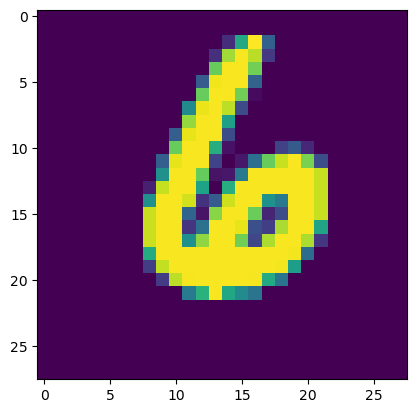

In [18]:
plt.imshow(test_data[50].reshape(28, 28))

In [30]:
type(out[0])

torch.Tensor

In [21]:
out.mean()

tensor(-5.3802, grad_fn=<MeanBackward0>)

In [22]:
out.std()

tensor(6.9115, grad_fn=<StdBackward0>)

In [32]:
torch.sum(out)

tensor(-53.8024, grad_fn=<SumBackward0>)

In [7]:
import torch.utils.data as U

In [8]:
dataset = U.TensorDataset(torch.tensor(x_train).float(), torch.tensor(y_train).long())
dataloader = U.DataLoader(dataset, batch_size=64, shuffle=True)

/var/folders/45/wj5m3mk56b38wrkpv32mr0240000gn/T/ipykernel_44423/142397643.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = U.TensorDataset(torch.tensor(x_train).float(), torch.tensor(y_train).long())


In [ ]:
.clone().detach()

In [9]:
dataset = U.TensorDataset(x_train.clone().detach(), y_train.clone().detach())
dataloader = U.DataLoader(dataset, batch_size=64, shuffle=True)

In [10]:
shit = iter(dataloader)

In [13]:
fuck = next(shit)

In [1]:
len(fuck[1])

NameError: name 'fuck' is not defined